## Models Part1

### Author: Lucia Zou
### Contact: lucia.zouyuebca@gmail.com
### Date: Nov.8th, 2023

### Table of Contents
- [Data Dictionary](#Data-Dictionary)
- [Linear Regression](#Linear-Regression)
- [Decision Tree](#Decision-Tree)
- [Random Forest](#Random-Forest)
- [Compare Models](#Compare-Models)

### Data Dictionary
| Column Name                | Description                                                                                                                       | DataTypes |
|----------------------------|-----------------------------------------------------------------------------------------------------------------------------------|------------|
| invoice_and_item_number    | Concatenated invoice and line number associated with the liquor sold. This provides a unique identifier for the individual liquor products included in the store's sales. | object     |
| date                       | Date of sale.                                                                                                                     | object     |
| store_number               | Unique number assigned to the store that sold the liquor.                                                                         | int64      |
| store_name                 | Name of the store that sold the liquor.                                                                                            | object     |
| address                    | Address of the store that sold the liquor.                                                                                        | object     |
| city                       | City where the store that sold the liquor is located.                                                                             | object     |
| zip_code                   | ZIP code where the store that sold the liquor is located.                                                                         | float64    |
| county_number              | Iowa county number for the county where the store that sold the liquor is located.                                             | float64    |
| county                     | County where the store that sold the liquor is located.                                                                           | object     |
| category                   | Category code associated with the liquor sold.                                                                                    | float64    |
| category_name              | Category of the liquor sold.                                                                                                      | object     |
| vendor_number              | The vendor number of the company for the brand of liquor sold.                                                                    | float64    |
| vendor_name                | The vendor name of the company for the brand of liquor sold.                                                                      | object     |
| item_number                | Item number for the individual liquor product sold.                                                                               | int64      |
| item_description           | Description of the individual liquor product sold.                                                                               | object     |
| pack                       | The number of bottles in a case for the liquor sold.               | int64      |
| bottle_volume_ml           | Volume of each liquor bottle sold in milliliters.                         | int64      |
| Alcohol_Type           | The general type of alcohol.                       | Object    |
| profit   | Total profit of liquor sold.                       | float64   |
| day     | The day of sale.                                   | object    |
| week    | The week of sale.                                  | object    |
| volume_3 | Volume of liquor in liters between 50.01 to 100L.  | uint8     |
| volume_4 | Volume of liquor in liters between 100.01 to 200L. | uint8     |
| volume_5 | Volume of liquor in liters between 200.01 to 1000 L.   | uint8     |
| volume_6 | Volume of liquor in liters larger than 1000.01 L.   | uint8     |
|Bourbon| The name of the type of alcohol|                  uint8    |     
|Brandy     | The name of the type of alcohol|              uint8 |        
| Cocktail        | The name of the type of alcohol|              uint8|         
|Cordials&Liqueur      | The name of the type of alcohol|        uint8 |        
| Gin                 | The name of the type of alcohol|          uint8|         
| OtherCategories     | The name of the type of alcohol|          uint8|         
|Rum              | The name of the type of alcohol|             uint8|         
| Schnapps      | The name of the type of alcohol|                uint8|         
|Scotch             | The name of the type of alcohol|           uint8 |        
|Specialty       | The name of the type of alcohol|              uint8 |        
|Spirits          | The name of the type of alcohol|             uint8         |
|Tequila       | The name of the type of alcohol|                uint8  |       
|Vodka      | The name of the type of alcohol|                   uint8    |     
|  Whisky    | The name of the type of alcohol|                    uint8 | 

### 

In [2]:
import pyarrow as pa
import pyarrow.parquet as pq
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler

In [3]:
df12=pd.read_parquet('IowaNext.parquet')

In [4]:
df12.shape

(2805303, 37)

In [5]:
df12.head()

,invoice_and_item_number,date,store_number,store_name,address,city,zip_code,county_number,county,category_name,...,Gin,OtherCategories,Rum,Schnapps,Scotch,Specialty,Spirits,Tequila,Vodka,Whisky
0,INV-33179700135,2021-01-04,2576,Hy-VeeWineandSpirits/StormLake,1250NLakeSt,StormLake,50588.0,11.0,Adair,WhiskeyLiqueur,...,0,0,0,0,0,0,1,0,0,0
1,INV-33196200106,2021-01-04,2649,Hy-Vee#3/Dubuque,400LocustSt,Dubuque,52001.0,31.0,Adair,CreamLiqueurs,...,0,0,0,0,0,0,0,0,0,0
2,INV-33184300011,2021-01-04,2539,Hy-VeeFoodStore/IowaFalls,640S.Oak,IowaFalls,50126.0,42.0,Adams,AmericanVodka,...,0,0,0,0,0,0,0,0,1,0
3,INV-33184100015,2021-01-04,4024,Wal-Mart1546/IowaFalls,840SOak,IowaFalls,50126.0,42.0,Adams,AmericanVodka,...,0,0,0,0,0,0,0,0,1,0
4,INV-33174200025,2021-01-04,5385,VineFood&Liquor,2704VineSt.,WestDesMoines,50265.0,77.0,Allamakee,ScotchWhiskies,...,0,0,0,0,0,0,0,0,0,1


In [6]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2805303 entries, 0 to 2805302
Data columns (total 37 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 float64       
 7   county_number            float64       
 8   county                   object        
 9   category_name            object        
 10  vendor_number            float64       
 11  vendor_name              object        
 12  item_number              int64         
 13  item_description         object        
 14  pack                     int64         
 15  bottle_volume_ml         int64         
 16  profit                   float64       
 17  day                      in

###

### Linear Regression

In [7]:
# Get the numeric columns
numeric_columns = df12.select_dtypes(include='number')

In [8]:
X = numeric_columns.drop(['profit'], axis=1)
y = df12['profit']

In [9]:
X.shape

(2805303, 27)

#### Check linearity

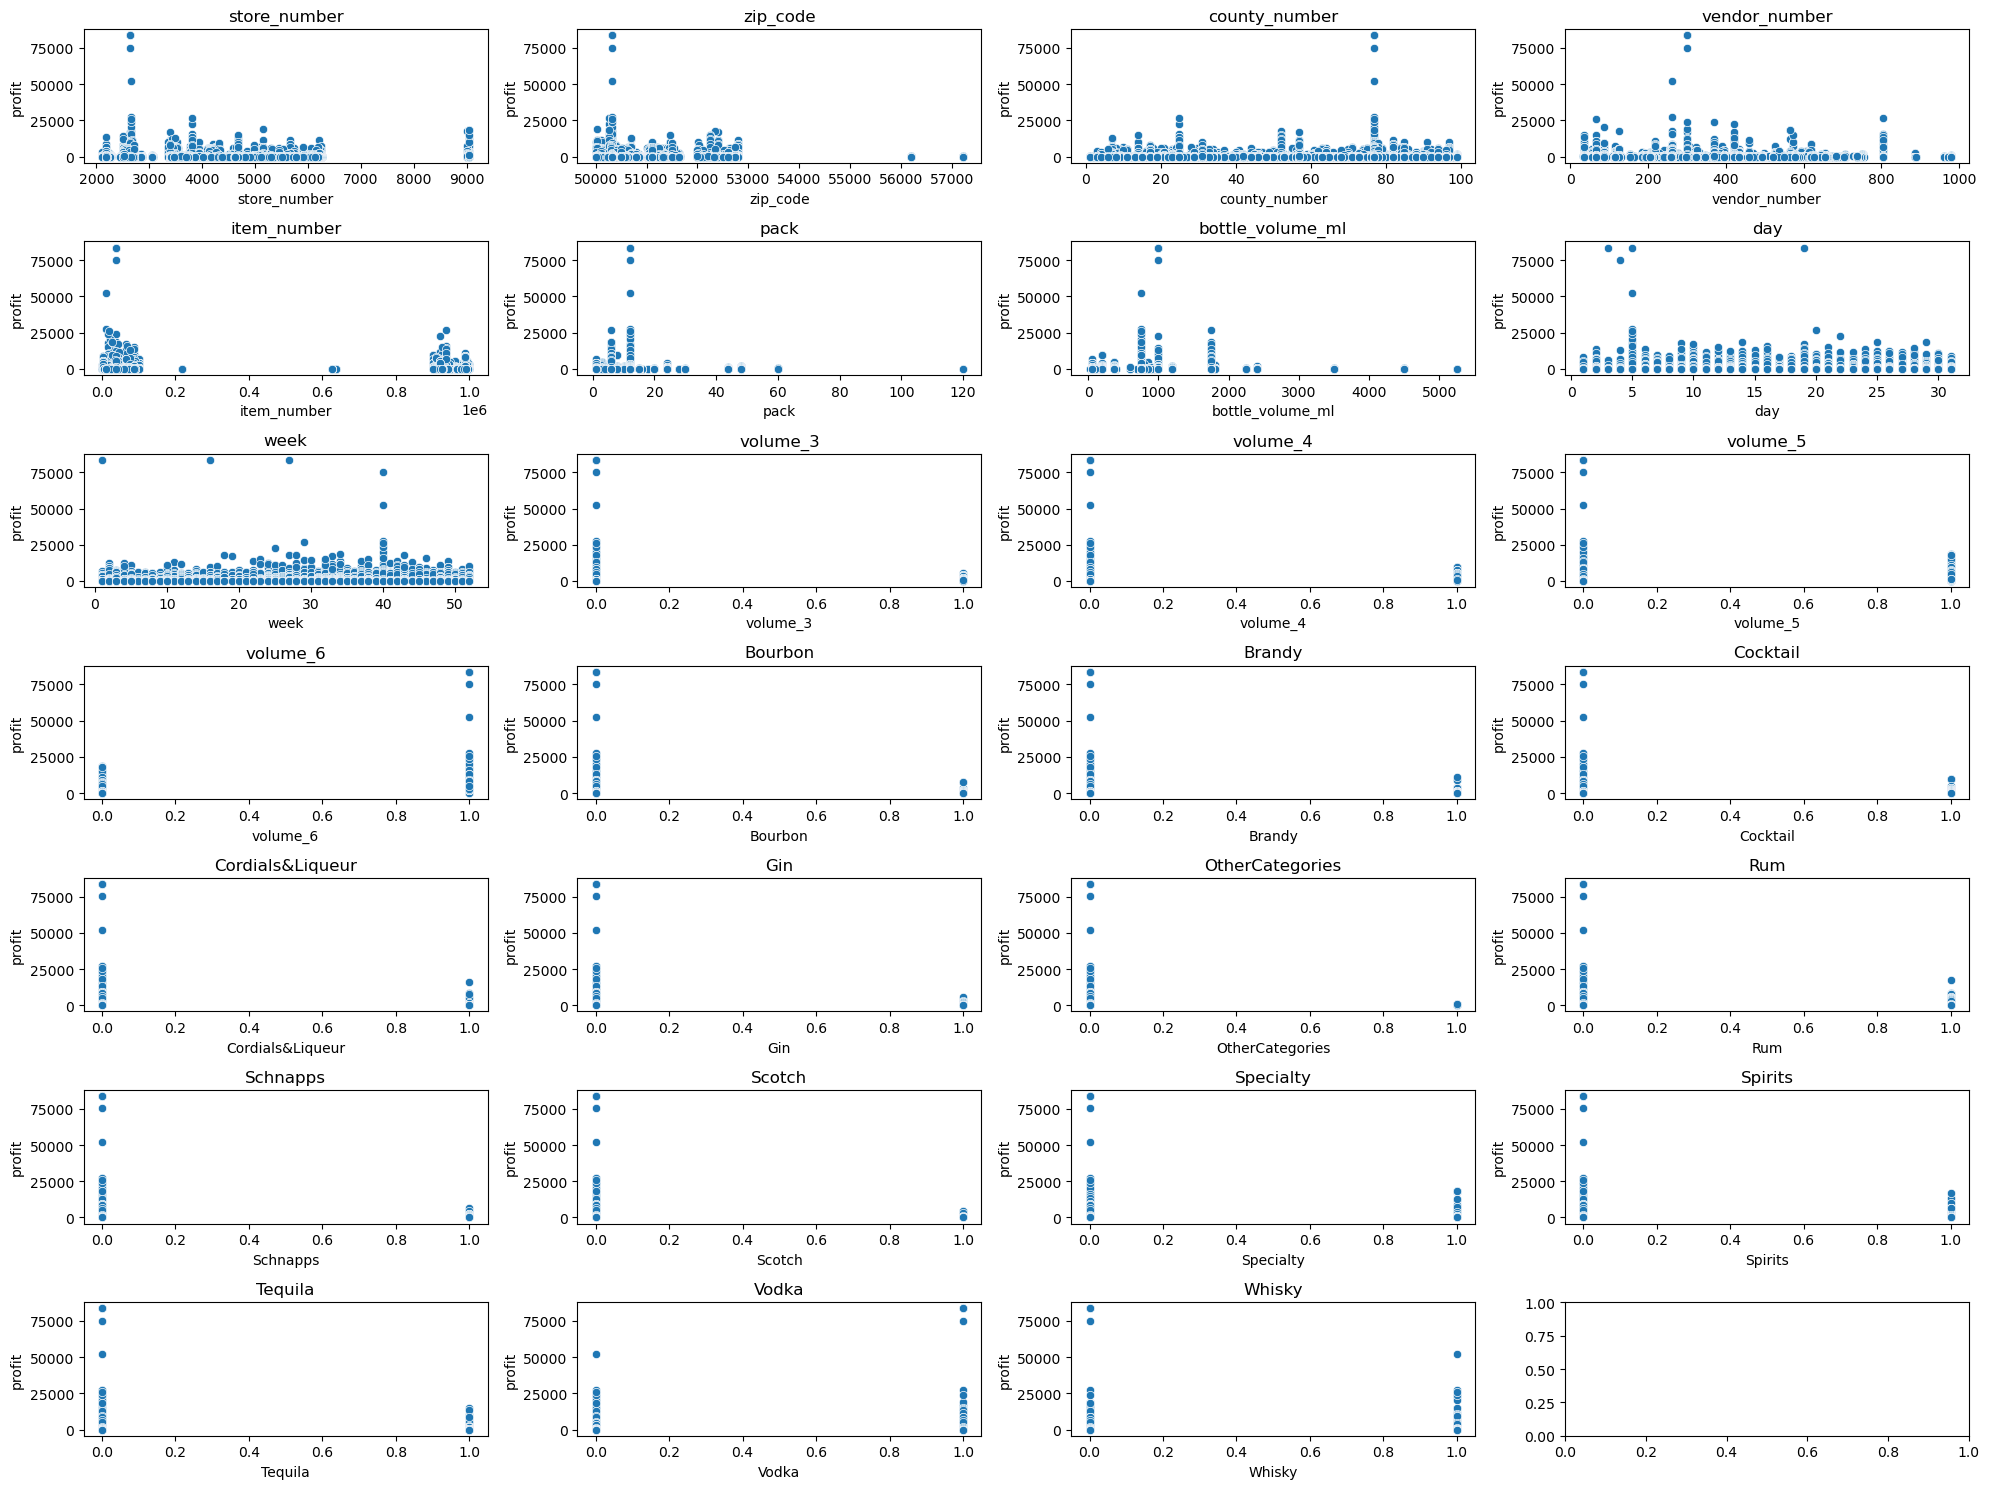

In [139]:
plt.subplots(7, 4, figsize=(20, 15))

count = 1

for col in X.columns:
    plt.subplot(7, 4, count)
    sns.scatterplot(x=X[col], y=y)
    plt.title(col)
    
    count += 1
    
plt.tight_layout()
plt.show()

From the above graph, we can see that there is no obvious linear relationship between X and y, lets see if there is high correlations between x variables.

In [140]:
X_corr = X.corr()
X_corr

,store_number,zip_code,county_number,vendor_number,item_number,pack,bottle_volume_ml,day,week,volume_3,...,Gin,OtherCategories,Rum,Schnapps,Scotch,Specialty,Spirits,Tequila,Vodka,Whisky
store_number,1.000000,-0.005427,-0.056249,0.011987,-0.001889,0.114093,-0.146830,0.010567,0.023552,-0.048219,...,-0.047498,-0.011385,-0.007861,-0.016577,-0.043750,0.009741,0.056638,-0.011036,0.038056,0.004308
zip_code,-0.005427,1.000000,-0.054742,-0.010876,-0.003595,0.024893,-0.000307,-0.003892,-0.003370,-0.002073,...,0.001901,-0.001138,-0.002788,0.023441,-0.005058,-0.015498,-0.003340,-0.003748,-0.010449,-0.004979
county_number,-0.056249,-0.054742,1.000000,-0.008437,0.000697,0.028733,-0.044670,-0.003619,-0.007697,0.007261,...,-0.000717,0.003557,-0.006402,-0.017701,0.003906,-0.003727,0.009501,0.011702,0.015868,-0.004629
vendor_number,0.011987,-0.010876,-0.008437,1.000000,0.072811,-0.027504,0.033688,0.002760,0.041694,-0.006837,...,0.013105,0.009986,-0.093073,-0.004689,0.001243,0.012151,0.224710,0.005783,0.085560,-0.226417
item_number,-0.001889,-0.003595,0.000697,0.072811,1.000000,-0.054214,-0.062552,-0.000730,0.003653,-0.005008,...,-0.030407,0.040043,-0.024433,0.101246,-0.018782,0.137300,0.063521,0.101483,-0.079086,-0.136964
pack,0.114093,0.024893,0.028733,-0.027504,-0.054214,1.000000,-0.471930,0.002053,-0.015746,-0.028036,...,-0.008984,-0.016569,-0.002865,0.002478,-0.037643,-0.082357,0.127041,-0.025950,0.034392,-0.017348
bottle_volume_ml,-0.146830,-0.000307,-0.044670,0.033688,-0.062552,-0.471930,1.000000,-0.005525,-0.013586,0.077130,...,0.043889,-0.003882,0.064966,-0.058738,-0.008677,-0.030829,-0.147468,-0.040493,0.061158,0.020194
day,0.010567,-0.003892,-0.003619,0.002760,-0.000730,0.002053,-0.005525,1.000000,0.087596,-0.003965,...,-0.000816,0.000946,-0.006706,-0.002333,0.000567,0.002356,0.002251,-0.000261,-0.001687,0.002300
week,0.023552,-0.003370,-0.007697,0.041694,0.003653,-0.015746,-0.013586,0.087596,1.000000,-0.001083,...,-0.000365,0.001995,-0.003725,-0.004338,-0.002173,0.047778,0.000018,0.006277,-0.006874,-0.010372
volume_3,-0.048219,-0.002073,0.007261,-0.006837,-0.005008,-0.028036,0.077130,-0.003965,-0.001083,1.000000,...,-0.006020,-0.002570,0.009348,0.000092,-0.006367,0.008368,-0.011010,0.005417,0.008712,-0.001206


Text(0.5, 1.0, 'Correlation Matrix')

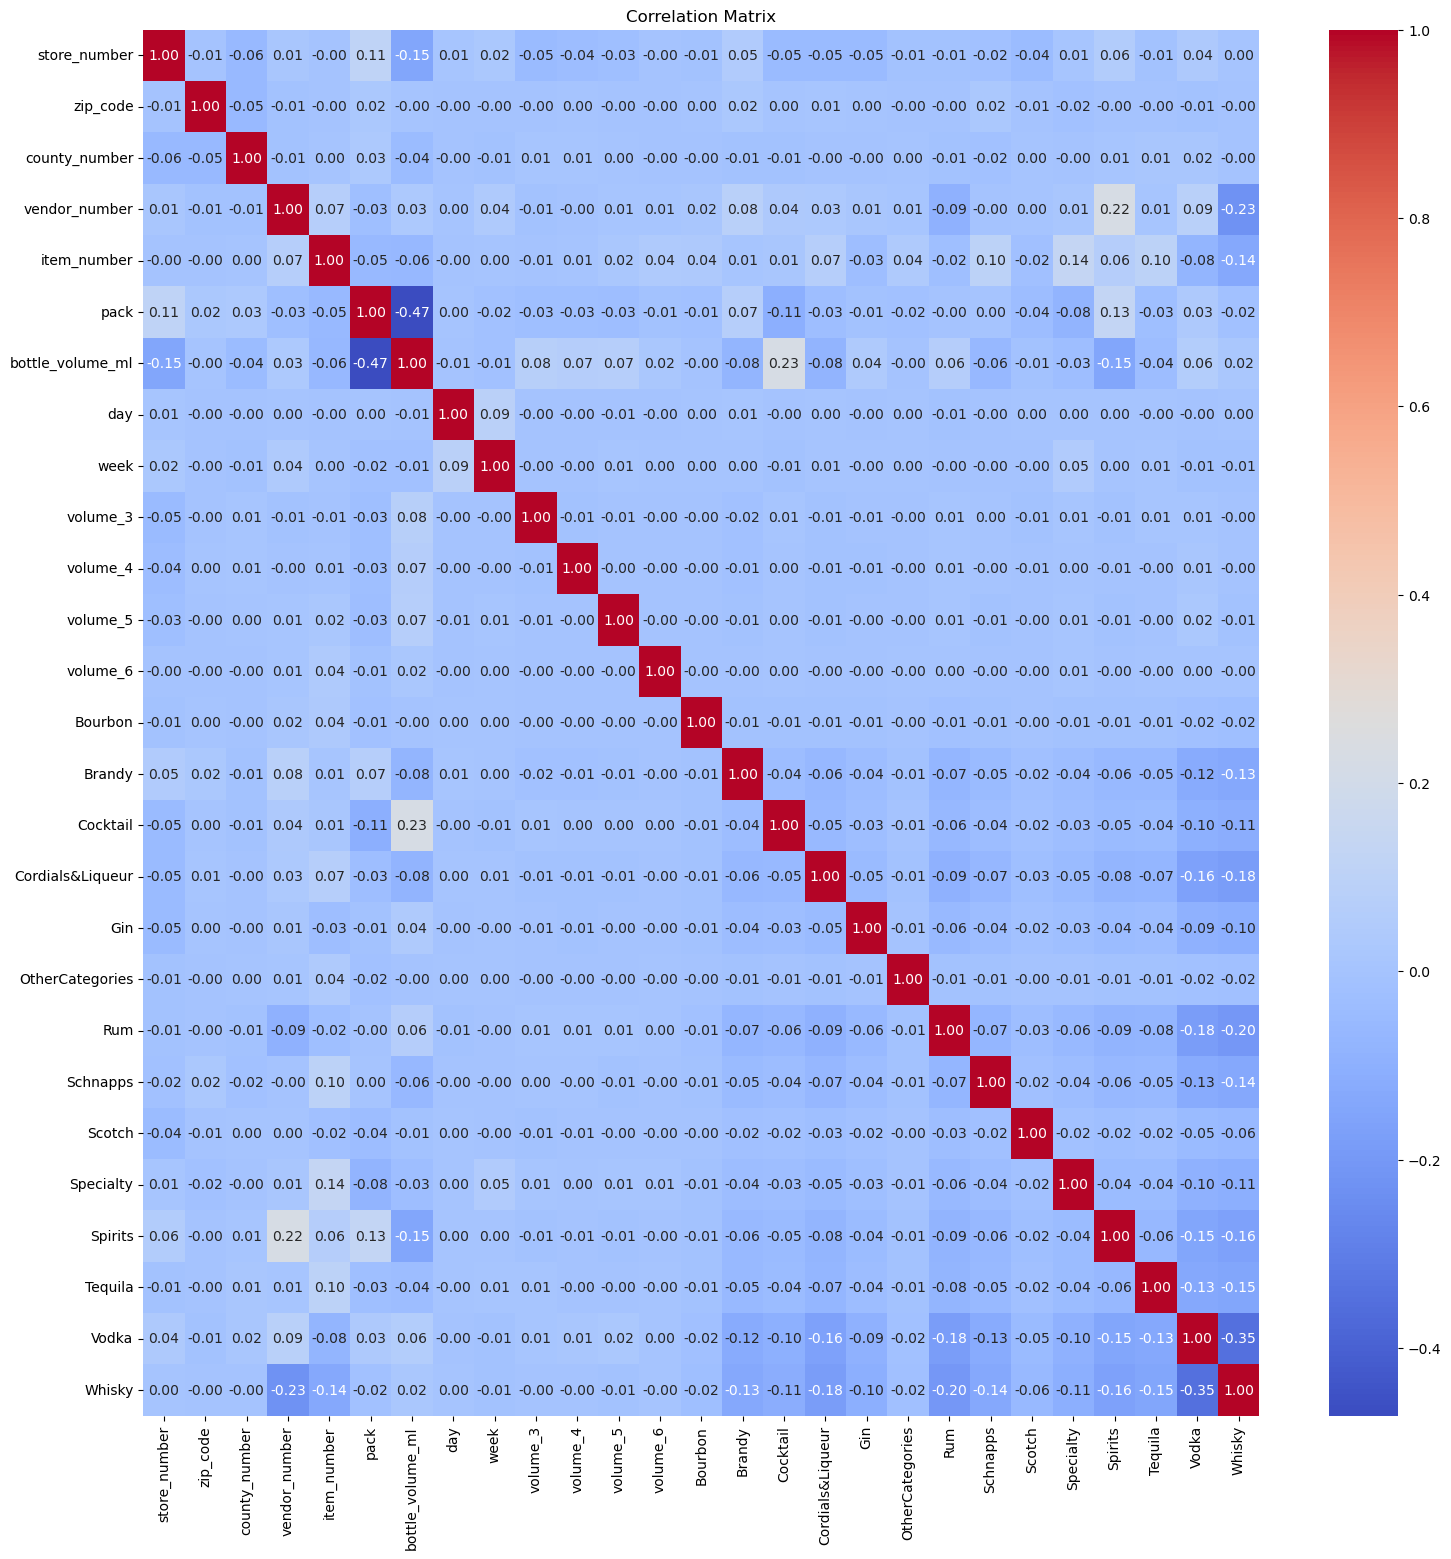

In [141]:
plt.figure(figsize=(18, 18))  
sns.heatmap(X_corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')

###

### Basic Model

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [157]:
# Add a constant term to the X matrix (intercept)
X_train_with_const = sm.add_constant(X_train)

# Fit a linear regression model with statsmodels
model = sm.OLS(y_train, X_train_with_const).fit()

# Get the summary statistics of the model
summary_for_basic = model.summary()

print(summary_for_basic)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.458
Model:                            OLS   Adj. R-squared:                  0.458
Method:                 Least Squares   F-statistic:                 7.288e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:21:27   Log-Likelihood:            -1.4396e+07
No. Observations:             2244242   AIC:                         2.879e+07
Df Residuals:                 2244215   BIC:                         2.879e+07
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               83.2009      4.831  

The model demonstrates a moderate level of explanatory power with a significant overall R square and p-values. All p-values are below 0.05 which means it can reject our H0, and it means that there is significant relationship between X and y.  However, the moderate R-squared suggests that there is room for improvement. Additionally, the nonrobust covariance type suggests that the model may not be accounting for potential issues like heteroscedasticity or autocorrelation in the residuals, which should be explored further.

In [158]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

y_t_pred = model.predict(sm.add_constant(X_train))

# Calculate metrics for training data
t_mse = mean_squared_error(y_train, y_t_pred)
t_mae = mean_absolute_error(y_train, y_t_pred)
t_rmse = np.sqrt(t_mse)
t_r2 = r2_score(y_train, y_t_pred)

print("Training Data Metrics:")
print(f"MSE: {t_mse}, MAE: {t_mae}, RMSE: {t_rmse}, R^2: {t_r2}")

Training Data Metrics:
MSE: 21845.87179962498, MAE: 36.43249329997631, RMSE: 147.8034904852554, R^2: 0.4577967134488259


In [159]:
y_test_p = model.predict(sm.add_constant(X_test))

# Calculate metrics for test data
test_mse = mean_squared_error(y_test, y_test_p)
test_mae = mean_absolute_error(y_test, y_test_p)
test_rmse = np.sqrt(test_mse)
test_r2 = r2_score(y_test, y_test_p)

print("Test Data Metrics:")
print(f"MSE: {test_mse}, MAE: {test_mae}, RMSE: {test_rmse}, R^2: {test_r2}")

Test Data Metrics:
MSE: 22292.990633850517, MAE: 36.37140012380091, RMSE: 149.30837429243718, R^2: 0.43368423967415315


An R² of 0.4578 for training and 0.4337 for testing indicates that around 45.78% and 43.37% of the variance in the target variable is explained by the model on the training and test sets, respectively. These values are not particularly high, suggesting that the model has moderate explanatory power. The slight drop in R² from training to testing is normal and does not indicate severe overfitting. However, the moderate R² values indicate that there might be room for improvement in the model's explanatory power. 

###

### Advanced Model

Remove Outliers and Scale the data for better performance

In [5]:
pack_mean = df12['pack'].mean()
pack_std = df12['pack'].std()
profit_mean = df12['profit'].mean()
profit_std = df12['profit'].std()

# Define the number of standard deviations
num_std_dev = 3

# Create masks for values within the desired range
pack_mask = df12['pack'].between(pack_mean - num_std_dev * pack_std, pack_mean + num_std_dev * pack_std)
profit_mask = df12['profit'].between(profit_mean - num_std_dev * profit_std, profit_mean + num_std_dev * profit_std)

# Apply the masks to filter the DataFrame
filtered_df = df12[pack_mask & profit_mask]

In [6]:
scaler = StandardScaler()
columns_to_scale = ['pack']

# Fit the scaler to the data and transform it
scaled_data = scaler.fit_transform(filtered_df[columns_to_scale])

# The scaled_data is a NumPy array. To add it back into the DataFrame:
filtered_df[columns_to_scale] = scaled_data

C:\Users\hp\AppData\Local\Temp\ipykernel_6104\2703616592.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df[columns_to_scale] = scaled_data


In [7]:
filtered_df.shape

(2710884, 37)

In [8]:
filtered_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2710884 entries, 1 to 2805302
Data columns (total 37 columns):
 #   Column                   Dtype         
---  ------                   -----         
 0   invoice_and_item_number  object        
 1   date                     datetime64[ns]
 2   store_number             int64         
 3   store_name               object        
 4   address                  object        
 5   city                     object        
 6   zip_code                 float64       
 7   county_number            float64       
 8   county                   object        
 9   category_name            object        
 10  vendor_number            float64       
 11  vendor_name              object        
 12  item_number              int64         
 13  item_description         object        
 14  pack                     float64       
 15  bottle_volume_ml         int64         
 16  profit                   float64       
 17  day                      in

In [9]:
numeric_columns = filtered_df.select_dtypes(include=['float64', 'int64', 'uint8']).columns

In [10]:
feature_columns = [col for col in numeric_columns if col != 'profit']

X1 = filtered_df[feature_columns]
y1 = filtered_df['profit']

In [11]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2, random_state=42)

In [161]:
# Add a constant term to the X matrix (intercept)
X1_train_with_const = sm.add_constant(X1_train)

# Fit a linear regression model with statsmodels
model_new = sm.OLS(y1_train, X1_train_with_const).fit()

# Get the summary statistics of the model
summary_for_advance= model_new.summary()

In [162]:
print(summary_for_advance)

                            OLS Regression Results                            
Dep. Variable:                 profit   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.308
Method:                 Least Squares   F-statistic:                 3.711e+04
Date:                Thu, 23 Nov 2023   Prob (F-statistic):               0.00
Time:                        12:28:06   Log-Likelihood:            -1.1502e+07
No. Observations:             2168707   AIC:                         2.300e+07
Df Residuals:                 2168680   BIC:                         2.301e+07
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               36.8761      1.619  

The R-squared lowered down after we removed outliers, which means they have a significant impact on the slope and intercept of the regression line, leading to an artificially inflated R-squared.  While the outliers are present, they pulled the regression line towards themselves, which made the model seem better at explaining the variance in the dependent variable (higher R-squared) than it actually is in a more typical scenario.

A decrease in R-squared indicated that a linear model is not the best fit for our data without outliers. We should explore other types of models(decision trees) that might better capture the relationship between variables in the absence of outliers.

In [164]:
y1_t_pred = model_new.predict(sm.add_constant(X1_train))

# Calculate metrics for training data
t1_mse = mean_squared_error(y1_train, y1_t_pred)
t1_mae = mean_absolute_error(y1_train, y1_t_pred)
t1_rmse = np.sqrt(t1_mse)
t1_r2 = r2_score(y1_train, y1_t_pred)

print("Training Data Metrics:")
print(f"MSE: {t1_mse}, MAE: {t1_mae}, RMSE: {t1_rmse}, R^2: {t1_r2}")

Training Data Metrics:
MSE: 2367.8249236546167, MAE: 30.28155489811726, RMSE: 48.66030131076683, R^2: 0.3078853161846177


In [166]:
y1_test_p = model_new.predict(sm.add_constant(X1_test))

# Calculate metrics for test data
test1_mse = mean_squared_error(y1_test, y1_test_p)
test1_mae = mean_absolute_error(y1_test, y1_test_p)
test1_rmse = np.sqrt(test_mse)
test1_r2 = r2_score(y1_test, y1_test_p)

print("Test Data Metrics:")
print(f"MSE: {test1_mse}, MAE: {test1_mae}, RMSE: {test1_rmse}, R^2: {test1_r2}")

Test Data Metrics:
MSE: 2379.321358429016, MAE: 30.349001863947247, RMSE: 149.30837429243718, R^2: 0.3045840057317043


The model does not show a significant difference in performance between the training and test datasets, which is good because it suggests that the model is not overfitting. However, the performance itself is not good because the R^2 values are very low, indicating that the model explains very little of the variation in the target variable. We need to intoduce more models to test our data.

###

### Decision Tree

#### Basic Model

In [17]:
# Create a scaler object
scaler = StandardScaler()

# Fit the scaler to the training data and transform
X1_train_scaled = pd.DataFrame(scaler.fit_transform(X1_train))

# Apply the same transformation to the test data
X1_test_scaled = pd.DataFrame(scaler.transform(X1_test))

In [168]:
decision_tree_scaled = DecisionTreeRegressor(random_state=42)
decision_tree_scaled.fit(X1_train_scaled, y1_train)

DecisionTreeRegressor(random_state=42)

In [169]:
from sklearn.metrics import r2_score

y1_train_pred = decision_tree_scaled.predict(X1_train_scaled)
y1_test_pred = decision_tree_scaled.predict(X1_test_scaled)

# Calculating the R2 score for both training and test sets
train_accuracy = r2_score(y1_train, y1_train_pred)
test_accuracy = r2_score(y1_test, y1_test_pred)

# Print the accuracy scores
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.9952420145298227
Test Set Accuracy: 0.5358346025740841


There is a big differenec between the 2 accuracy scores, we would like to build a better model by change parameters.

###

### Advanced Model

#### Find the best parameter of Max Depth

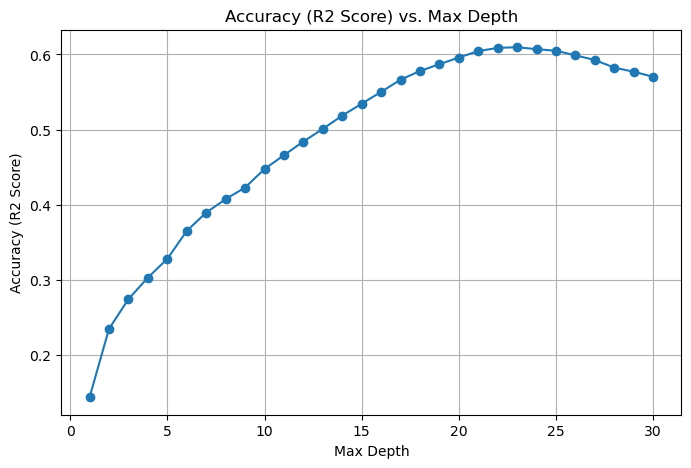

In [170]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

max_depth_values = range(1, 31)
accuracy_scores = []

for max_depth in max_depth_values:
    # Create and train the Decision Tree classifier with varying max_depth
    clf = DecisionTreeRegressor(max_depth=max_depth, random_state=42)
    clf.fit(X1_train_scaled, y1_train)  
    
    # Make predictions on the testing data (X1_test_scaled)
    y1_pred = clf.predict(X1_test_scaled)
    
    # Calculate accuracy (R2 score) and store it in the list
    accuracy = r2_score(y1_test, y1_pred) 
    accuracy_scores.append(accuracy)

# Create a line plot to visualize accuracy (R2 Score) vs. max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy (R2 Score) vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (R2 Score)')
plt.grid(True)
plt.show()

From the graph, we can see that the best parameter of max depth is 23.

#### Use Grid Search to find best parameters

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler

In [14]:
y1_test.shape

(542177,)

In [15]:
y1_train.shape

(2168707,)

In [18]:
# Create the PCA object
n_components = 20 
my_PCA = PCA(n_components=n_components)

# Fit and transform the scaled training data using PCA
X1_train_PCA = my_PCA.fit_transform(X1_train_scaled)

# Transform the scaled testing data using the same PCA
X1_test_PCA = my_PCA.transform(X1_test_scaled)

In [19]:
print(X1_train_scaled.shape)
print(X1_test_scaled.shape)

(2168707, 27)
(542177, 27)


In [20]:
print(X1_test_PCA.shape)
print(X1_train_PCA.shape)

(542177, 20)
(2168707, 20)


In [21]:
pipeline1 = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('regressor', DecisionTreeRegressor())
])

# Define the parameter grid for grid search
param_grid1 = {
    'regressor__max_depth': [22,23],  
    'regressor__min_samples_split': [2, 5],
    'regressor__min_samples_leaf': [1, 2]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search1 = GridSearchCV(pipeline1, param_grid1, cv=5, n_jobs=-1, verbose=1, error_score='raise')

# Fit the grid search on the PCA-transformed data
grid_search1.fit(X1_train_PCA, y1_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('pca', PCA(n_components=20)),
                                       ('regressor', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__max_depth': [22, 23],
                         'regressor__min_samples_leaf': [1, 2],
                         'regressor__min_samples_split': [2, 5]},
             verbose=1)

In [22]:
pipeline2 = Pipeline([
    ('pca', PCA(n_components=n_components)),
    ('regressor', DecisionTreeRegressor())
])

# Define the parameter grid for grid search
param_grid2 = {
    'regressor__min_samples_split': [5, 10],
    'regressor__min_samples_leaf': [2, 4]
}

# Create a GridSearchCV object with 5-fold cross-validation
grid_search2 = GridSearchCV(pipeline2, param_grid2, cv=5, n_jobs=-1, verbose=1, error_score='raise')

# Fit the grid search on the PCA-transformed data
grid_search2.fit(X1_train_PCA, y1_train)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


GridSearchCV(cv=5, error_score='raise',
             estimator=Pipeline(steps=[('pca', PCA(n_components=20)),
                                       ('regressor', DecisionTreeRegressor())]),
             n_jobs=-1,
             param_grid={'regressor__min_samples_leaf': [2, 4],
                         'regressor__min_samples_split': [5, 10]},
             verbose=1)

In [23]:
best_params = grid_search1.best_params_
print("Best parameters:", best_params)

Best parameters: {'regressor__max_depth': 22, 'regressor__min_samples_leaf': 2, 'regressor__min_samples_split': 5}


In [24]:
best_params = grid_search2.best_params_
print("Best parameters:", best_params)

Best parameters: {'regressor__min_samples_leaf': 4, 'regressor__min_samples_split': 10}


In [29]:
decision_tree_b = DecisionTreeRegressor(max_depth=22, 
                                           min_samples_leaf=2,
                                           min_samples_split=5,
                                           random_state=42)

In [31]:
decision_tree_b.fit(X1_train_scaled, y1_train)

# Make predictions on both the training and test sets
y1_train_pred = decision_tree_b.predict(X1_train_scaled)
y1_test_pred = decision_tree_b.predict(X1_test_scaled)

# Calculate the R2 score for both training and test sets
train_accuracy = r2_score(y1_train, y1_train_pred)
test_accuracy = r2_score(y1_test, y1_test_pred)

# Print the accuracy scores
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.7291999289874842
Test Set Accuracy: 0.6264034932323141


###

In [25]:
decision_tree_best = DecisionTreeRegressor(max_depth=22, 
                                           min_samples_leaf=4,
                                           min_samples_split=10,
                                           random_state=42)

In [27]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [28]:
# Train the model using the scaled training data
decision_tree_best.fit(X1_train_scaled, y1_train)

# Make predictions on both the training and test sets
y1_train_pred = decision_tree_best.predict(X1_train_scaled)
y1_test_pred = decision_tree_best.predict(X1_test_scaled)

# Calculate the R2 score for both training and test sets
train_accuracy = r2_score(y1_train, y1_train_pred)
test_accuracy = r2_score(y1_test, y1_test_pred)

# Print the accuracy scores
print("Training Set Accuracy:", train_accuracy)
print("Test Set Accuracy:", test_accuracy)

Training Set Accuracy: 0.7130241758207916
Test Set Accuracy: 0.6349492045148002


An R2 score of around 0.699 on the test set means the model explains approximately 69.9% of the variance in the target variable, which is  acceptable depending on the complexity of the problem and the nature of the data.

In summary, while the decision tree model shows some capability in predicting your target variable, there's a notable scope for improvement.There is still a big difference between test accuarcy and train accuarcy, which means overfitting.

Therefore, we should look for other models to improve the overfitting problem.

###

### Random Forest

#### Basic Model

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Create the Random Forest Regressor model
random_forest_model = RandomForestRegressor(random_state=42, max_depth=10, n_jobs=-1)

# Train the model on the training data
random_forest_model.fit(X1_train, y1_train)

# Make predictions on the training and test sets
y1_train_pred_rf = random_forest_model.predict(X1_train)
y1_test_pred_rf = random_forest_model.predict(X1_test)

# Evaluate the model
train_accuracy_rf = r2_score(y1_train, y1_train_pred_rf)
test_accuracy_rf = r2_score(y1_test, y1_test_pred_rf)

print("Random Forest Training Set Accuracy:", train_accuracy_rf)
print("Random Forest Test Set Accuracy:", test_accuracy_rf)

Random Forest Training Set Accuracy: 0.45692146161461245
Random Forest Test Set Accuracy: 0.4524754515651671



Train Accuracy is 95.18%, which indicates that the Random Forest model performs very well on the training data.  However, the test set accuracy is substantially lower than the training set accuracy. While 68.06% accuracy is moderate and suggests that the model has learned some generalizable patterns, the drop from 95.18% indicates that the model's ability to generalize to unseen data is limited compared to its performance on the training data.

###

#### Advanced Model

### Do not run this code, it ran over 18 hours.

In [38]:
max_depth_values = range(25, 35)
accuracy_scores = []

for max_depth in max_depth_values:
    # Create and train the Decision Tree classifier with varying max_depth
    clf = RandomForestRegressor(max_depth=max_depth, random_state=42)
    clf.fit(X1_train_scaled, y1_train)  
    
    # Make predictions on the testing data (X1_test_scaled)
    y1_pred = clf.predict(X1_test_scaled)
    
    # Calculate accuracy (R2 score) and store it in the list
    accuracy = r2_score(y1_test, y1_pred) 
    accuracy_scores.append(accuracy)

KeyboardInterrupt: 

In [ ]:
# Create a line plot to visualize accuracy (R2 Score) vs. max_depth
plt.figure(figsize=(8, 5))
plt.plot(max_depth_values, accuracy_scores, marker='o', linestyle='-')
plt.title('Accuracy (R2 Score) vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy (R2 Score)')
plt.grid(True)
plt.show()

### Since we could not find the best parameters for the whole dataset for Random Forest due to time consuming problem, we would use the result of subest to compare all models in this notebook

#### Best params for subset(random state=42, size=50K)

In [95]:
best_params = grid_search.best_params_
print("Best parameters:", best_params)

Best parameters: {'max_depth': 30, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 200}


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Make predictions on the test data
y_pred = rf_regressor.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error (MAE):", mae)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)

# Calculate Root Mean Squared Error
rmse = np.sqrt(mse)
print("Root Mean Squared Error (RMSE):", rmse)

# Calculate R-squared (R²)
r_squared = r2_score(y_test, y_pred)
print("R-squared (R²):", r_squared)

In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

y_train_pred = rf_regressor.predict(X_train)

# Calculate Mean Absolute Error on training data
mae_train = mean_absolute_error(y_train, y_train_pred)
print("Mean Absolute Error on Training Data (MAE):", mae_train)

# Calculate Mean Squared Error on training data
mse_train = mean_squared_error(y_train, y_train_pred)
print("Mean Squared Error on Training Data (MSE):", mse_train)

# Calculate Root Mean Squared Error on training data
rmse_train = np.sqrt(mse_train)
print("Root Mean Squared Error on Training Data (RMSE):", rmse_train)

# Calculate R-squared on training data
r_squared_train = r2_score(y_train, y_train_pred)
print("R-squared on Training Data (R²):", r_squared_train)

#### Evaluatng performance by using subset:
MSE on Test Data is 0.3079, and MSE on Training Data is 0.1064.
A much lower MSE on the train suggests that the model performs significantly better on the training data compared to the test data. This can be a sign of overfitting, where the model is too closely fitted to the training data and doesn't generalize as well to unseen data.

R² on Test Data is 0.68, means that approximately 68% of the variance in the test dataset is explained by model. It's a moderate score, indicating a fair level of prediction accuracy.

R² on Training Data is 0.89. It shows that the model explains a large portion of the variance in the training data. However, when contrasted with the test R², it again suggests overfitting.

###

## Compare Models

### Comparing all models for subsets

In [244]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Linear Regression Model Metrics
y1_test_p = model1.predict(sm.add_constant(X1_test))
test_mse_linear = mean_squared_error(y1_test, y1_test_p)
test_mae_linear = mean_absolute_error(y1_test, y1_test_p)
test_rmse_linear = np.sqrt(test_mse_linear)
test_r2_linear = r2_score(y1_test, y1_test_p)

# Decision Tree Model Metrics
y1_test_pred_decision_tree = decision_tree_max_depth_12.predict(X1_test)
test_mse_decision_tree = mean_squared_error(y1_test, y1_test_pred_decision_tree)
test_mae_decision_tree = mean_absolute_error(y1_test, y1_test_pred_decision_tree)
test_rmse_decision_tree = np.sqrt(test_mse_decision_tree)
test_r2_decision_tree = r2_score(y1_test, y1_test_pred_decision_tree)

# Random Forest Model Metrics
y1_test_pred_rf = random_forest_model.predict(X1_test)
test_mse_random_forest = mean_squared_error(y1_test, y1_test_pred_rf)
test_mae_random_forest = mean_absolute_error(y1_test, y1_test_pred_rf)
test_rmse_random_forest = np.sqrt(test_mse_random_forest)
test_r2_random_forest = r2_score(y1_test, y1_test_pred_rf)

C:\Users\hp\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but DecisionTreeRegressor was fitted without feature names
  warnings.warn(


In [250]:
decision = decision_tree_max_depth_12
linear=model1

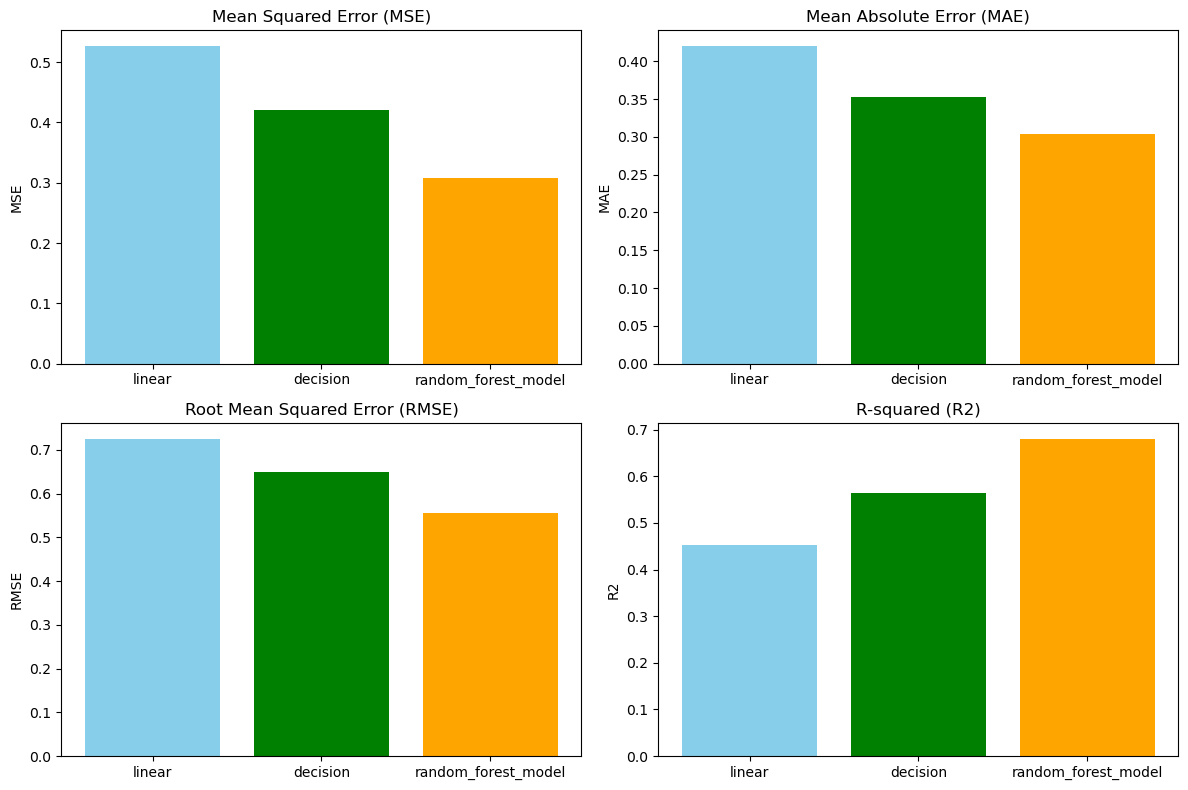

In [251]:
model_names = ['linear', 'decision', 'random_forest_model']
mse_values = [test_mse_linear, test_mse_decision_tree, test_mse_random_forest]
mae_values = [test_mae_linear, test_mae_decision_tree, test_mae_random_forest]
rmse_values = [test_rmse_linear, test_rmse_decision_tree, test_rmse_random_forest]
r2_values = [test_r2_linear, test_r2_decision_tree, test_r2_random_forest]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Mean Squared Error (MSE)
axs[0, 0].bar(model_names, mse_values, color=['skyblue', 'green', 'orange'])
axs[0, 0].set_title('Mean Squared Error (MSE)')
axs[0, 0].set_ylabel('MSE')

# Plot Mean Absolute Error (MAE)
axs[0, 1].bar(model_names, mae_values, color=['skyblue', 'green', 'orange'])
axs[0, 1].set_title('Mean Absolute Error (MAE)')
axs[0, 1].set_ylabel('MAE')

# Plot Root Mean Squared Error (RMSE)
axs[1, 0].bar(model_names, rmse_values, color=['skyblue', 'green', 'orange'])
axs[1, 0].set_title('Root Mean Squared Error (RMSE)')
axs[1, 0].set_ylabel('RMSE')

# Plot R-squared (R2)
axs[1, 1].bar(model_names, r2_values, color=['skyblue', 'green', 'orange'])
axs[1, 1].set_title('R-squared (R2)')
axs[1, 1].set_ylabel('R2')

plt.tight_layout()
plt.show()

From the bar charts, we can indicate that the random forest model has the lowest MSE and RMSE, suggesting it has the smallest average squared errors and thus the best performance on these metrics.

Similarly, the random forest model has the lowest MAE, indicating it has the smallest average absolute errors.
The decision tree model has the highest R2 value, suggesting it can explain a higher proportion of variance than the other two models.
Considering that random forest performs best on the other three metrics, the random forest model can be considered the overall best performing model among the three.
#### However, the random forest model for subset took us over 1 hour to get answer, thus we need to look for better models with less time consuming.

###

### Compare advanced models for all data 

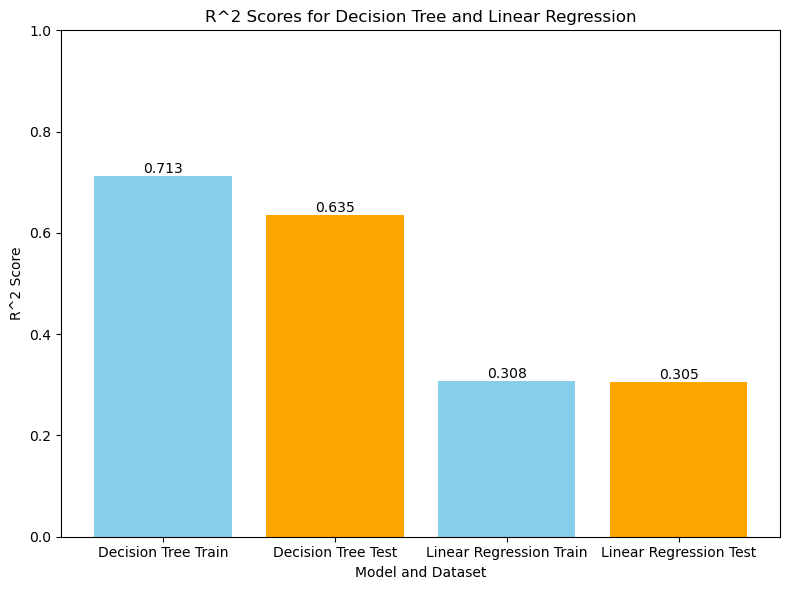

In [15]:
import matplotlib.pyplot as plt

# Creating a dictionary with the data
data = {
    'Decision Tree Train': 0.713,
    'Decision Tree Test': 0.635,
    'Linear Regression Train': 0.308,
    'Linear Regression Test': 0.305
}
# Plotting the bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(data.keys(), data.values(), color=['skyblue', 'orange', 'skyblue', 'orange'])
plt.xlabel('Model and Dataset')
plt.ylabel('R^2 Score')
plt.title('R^2 Scores for Decision Tree and Linear Regression')
plt.ylim(0, 1)
# Adding the text labels on the bars

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 3), ha='center', va='bottom')
plt.tight_layout()
plt.show()

For decision tree, the model's performance has decreased on the test data compared to the training data, but it still explains a decent amount of variance, around 63.5%.

For Linear Regression, the r sqaure for trained data is 0.308. This is substantially lower than the Decision Tree's performance, indicating that Linear Regression has a weaker fit on the training data, explaining only about 30.8% of the variance.  R^2 score on the test dataset, which is close to its training score at approximately 0.305. This consistency between training and test performance suggests that the model generalizes as well as it fits the training data, but overall, the fit is not very strong.

Thus, the Decision Tree model has higher R^2 scores than the Linear Regression model on both the training and testing datasets, which implies that it may be a better model for this particular dataset.

While the Decision Tree model seems to perform better on this particular dataset, the possibility of overfitting should be investigated further, possibly through additional validation techniques or by considering more complex models. The Linear Regression model's low R^2 scores suggest that it is underfitting the dataset.  We would look for better models.

#### Next Notebook is Models PT2
#### Models Subset is the notebook contains performances of models with subset.

END